<a href="https://colab.research.google.com/github/eduardofrancajr/PI4-analise_de_sentimentos/blob/main/Modelos_Supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importação das Bibliotecas e Configuração Inicial

Nesta etapa, importamos todas as bibliotecas necessárias para o processamento de texto, vetorização TF-IDF, divisão da base, ajuste de hiperparâmetros com GridSearch, treinamento de modelos supervisionados (SVM, KNN, Naive Bayes e Regressão Logística) e avaliação dos resultados. Também configuramos o estilo visual do Seaborn para melhorar a qualidade dos gráficos.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns  # <-- Acrescentado

# Configuração do estilo visual
sns.set(style="whitegrid")

#2. Carregamento e Preparação da Base de Dados

Nesta etapa, carregamos o arquivo base_com_polaridade_transformer.csv e removemos possíveis registros com valores ausentes nas colunas essenciais. Em seguida, separamos as sentenças (X) e seus respectivos rótulos de polaridade (y) para utilização no processo de modelagem.

In [2]:
df = pd.read_csv("base_com_polaridade_transformer.csv")
df = df.dropna(subset=["sentenca", "polaridade"])

X = df["sentenca"]
y = df["polaridade"]

#3. Divisão da Base em Treino e Teste

Nesta etapa, dividimos os dados em conjuntos de treinamento (75%) e teste (25%), garantindo que a distribuição das classes seja preservada por meio do parâmetro stratify=y. Isso assegura que o modelo seja treinado e avaliado com proporções equilibradas de cada categoria de polaridade.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

#4. Vetorização das Sentenças com TF-IDF

Nesta etapa, transformamos as sentenças em representações numéricas utilizando o TF-IDF. Limitamos o vocabulário a 5000 características e aplicamos o ajuste apenas nos dados de treino, garantindo que o conjunto de teste seja transformado com o mesmo vocabulário aprendido.

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#5. Definição dos Modelos Supervisionados

Nesta etapa, definimos um dicionário contendo os principais modelos supervisionados que serão avaliados: SVM (LinearSVC), KNN, Naive Bayes e Regressão Logística. Cada modelo será treinado e comparado posteriormente com base em seu desempenho.

In [6]:
models = {
    "SVM (LinearSVC)": LinearSVC(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=300)
}

#6. Ajuste de Hiperparâmetros com GridSearch

Nesta etapa, realizamos a busca pelos melhores hiperparâmetros para dois modelos específicos:

SVM (LinearSVC): testando diferentes valores de C.

Regressão Logística: variando tanto o parâmetro C quanto o algoritmo de otimização (solver).

O GridSearchCV é utilizado com validação cruzada de 3 dobras (cv=3), avaliando o desempenho por acurácia. Ao final, os melhores modelos encontrados são adicionados ao dicionário models para posterior comparação.

In [7]:
# ----- Grid para SVM -----
param_grid_svm = {
    "C": [0.1, 1, 2, 5]
}

grid_svm = GridSearchCV(
    LinearSVC(),
    param_grid_svm,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_svm.fit(X_train_vec, y_train)
best_svm = grid_svm.best_estimator_
models["SVM (GridSearch)"] = best_svm

# ----- Grid para Logistic Regression -----
param_grid_lr = {
    "C": [0.1, 1, 2, 5],
    "solver": ["lbfgs", "liblinear"]
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=300),
    param_grid_lr,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)
grid_lr.fit(X_train_vec, y_train)
best_lr = grid_lr.best_estimator_
models["Logistic Regression (GridSearch)"] = best_lr

#7. Treinamento e Avaliação dos Modelos

Nesta etapa, cada modelo definido no dicionário models é treinado utilizando o conjunto vetorizado de treino. Em seguida, realizamos previsões no conjunto de teste e calculamos a acurácia, armazenando os resultados para comparação posterior. Também é exibido o classification report de cada modelo, contendo métricas como precisão, recall e F1-score.

In [8]:
results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(f"\n===== {name} =====")
    print(f"Melhor acurácia: {round(acc, 4)}")
    print(classification_report(y_test, preds))


===== SVM (LinearSVC) =====
Melhor acurácia: 0.4211
              precision    recall  f1-score   support

    negativo       0.40      0.86      0.55         7
      neutro       0.00      0.00      0.00         6
    positivo       0.50      0.33      0.40         6

    accuracy                           0.42        19
   macro avg       0.30      0.40      0.32        19
weighted avg       0.31      0.42      0.33        19


===== KNN (k=5) =====
Melhor acurácia: 0.2632
              precision    recall  f1-score   support

    negativo       0.25      0.29      0.27         7
      neutro       0.14      0.17      0.15         6
    positivo       0.50      0.33      0.40         6

    accuracy                           0.26        19
   macro avg       0.30      0.26      0.27        19
weighted avg       0.30      0.26      0.27        19


===== Naive Bayes =====
Melhor acurácia: 0.3684
              precision    recall  f1-score   support

    negativo       0.40      0.86 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

#8. Visualização da Acurácia dos Modelos

Nesta etapa, geramos um gráfico de barras utilizando Seaborn para comparar visualmente a acurácia obtida por cada modelo supervisionado. O gráfico facilita a identificação de quais algoritmos tiveram melhor desempenho na classificação das polaridades textuais.

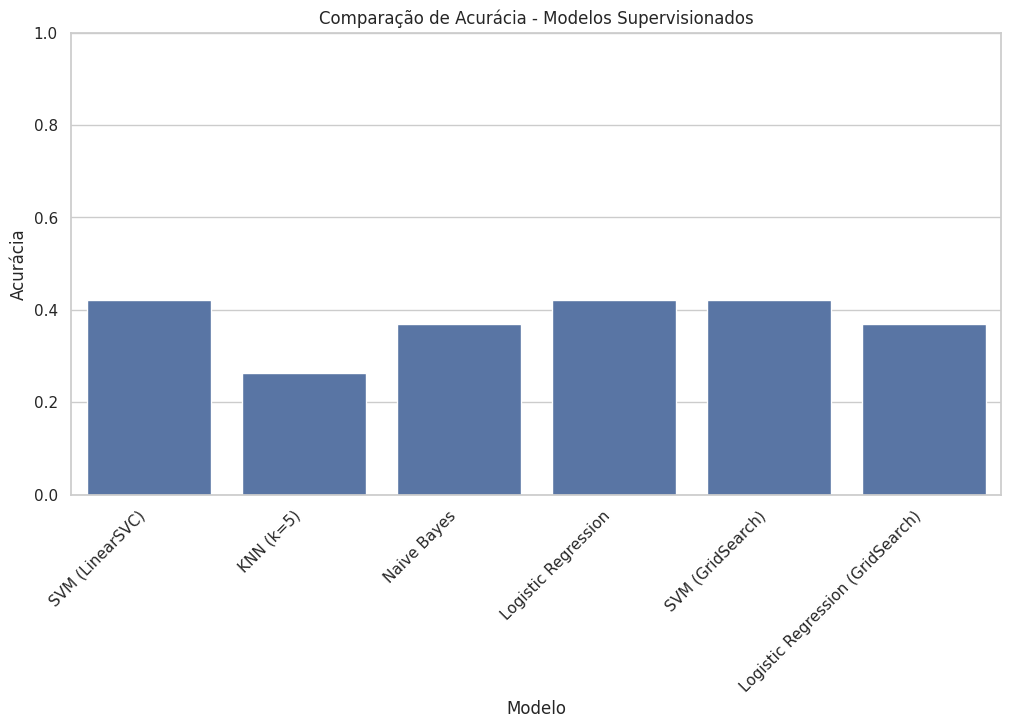

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=list(results.keys()),
    y=list(results.values())
)
plt.title("Comparação de Acurácia - Modelos Supervisionados")
plt.ylabel("Acurácia")
plt.xlabel("Modelo")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.show()